# CLUSTERING ANALYSIS 

### Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

## Objective:
### The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

## Datasets :

## Data Preprocessing:
### 1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
### 2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
### 3.	Use multiple visualizations to understand the hidden patterns in the dataset

## Implementing Clustering Algorithms:
### •	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
### •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
### •	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 2: Load dataset
df = pd.read_csv("EastWestAirlines.csv")

# --- Data Preprocessing ---
# 1. Handle missing values (drop rows with NA)
df = df.dropna()

# 2. Remove outliers using IQR method
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# 3. Scale features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

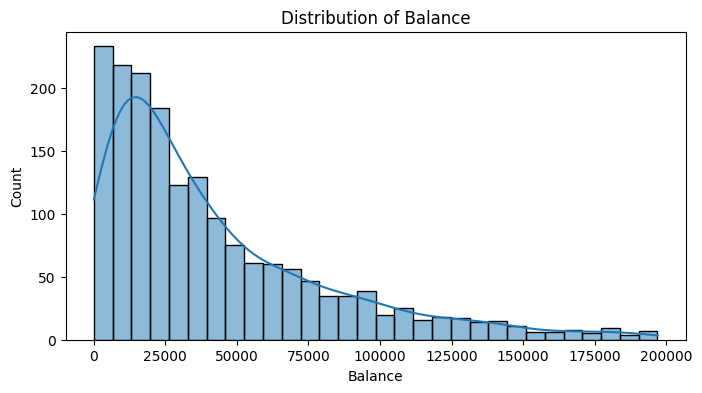

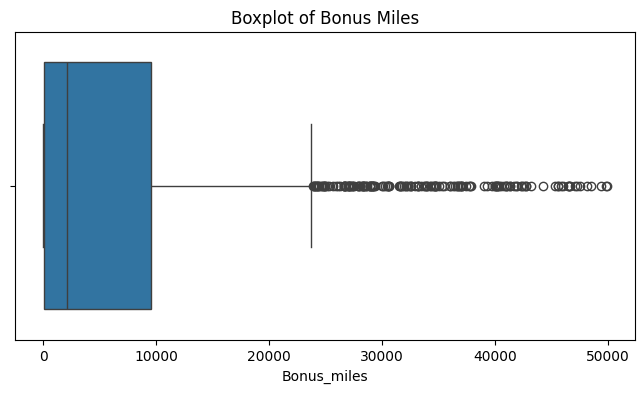

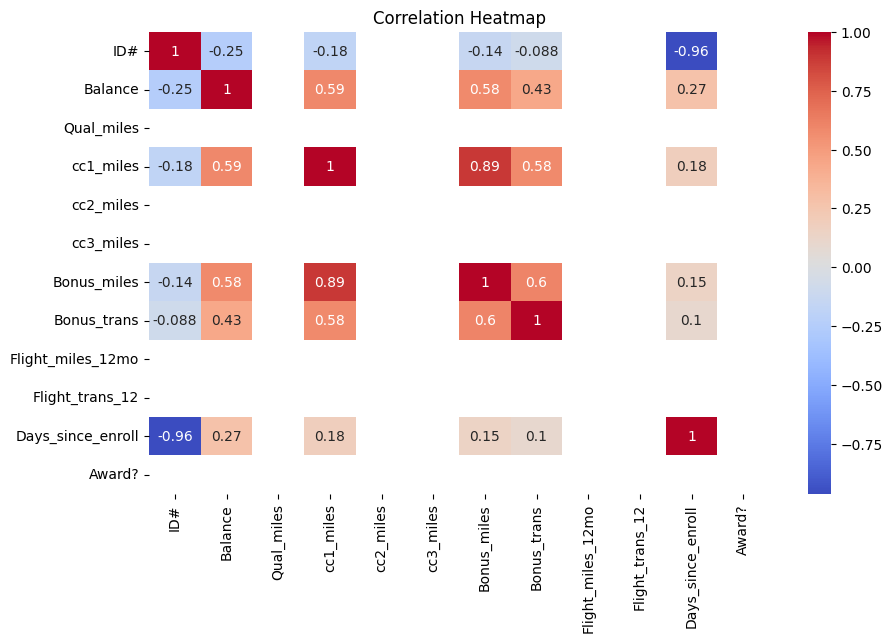

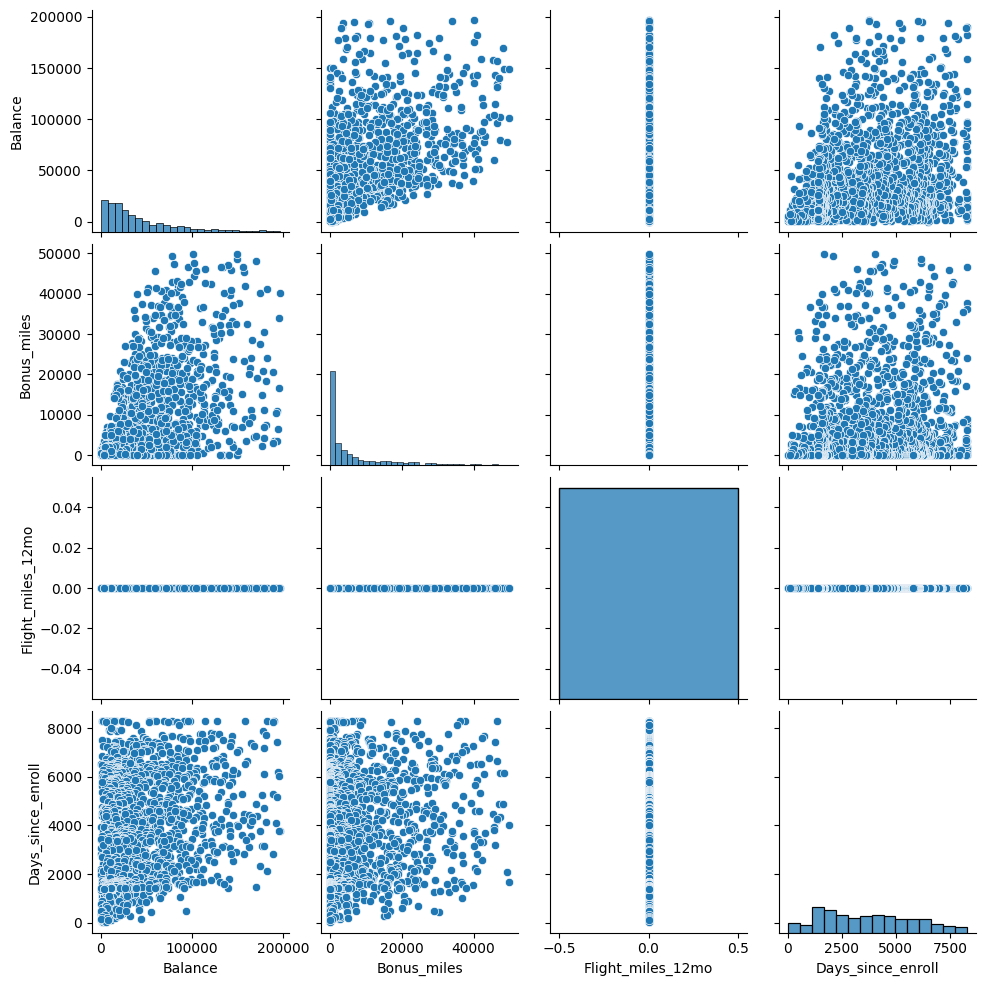

In [2]:
# --- Exploratory Data Analysis (EDA) ---
# Histogram
plt.figure(figsize=(8,4))
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title("Distribution of Balance")
plt.show()

# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Bonus_miles'])
plt.title("Boxplot of Bonus Miles")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for selected features
sns.pairplot(df[['Balance','Bonus_miles','Flight_miles_12mo','Days_since_enroll']])
plt.show()

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Step 2: Load and preprocess dataset
df = pd.read_csv("EastWestAirlines.csv")
df = df.dropna()   # drop missing values

# Scale numeric features
num_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X = scaler.fit_transform(df[num_cols])

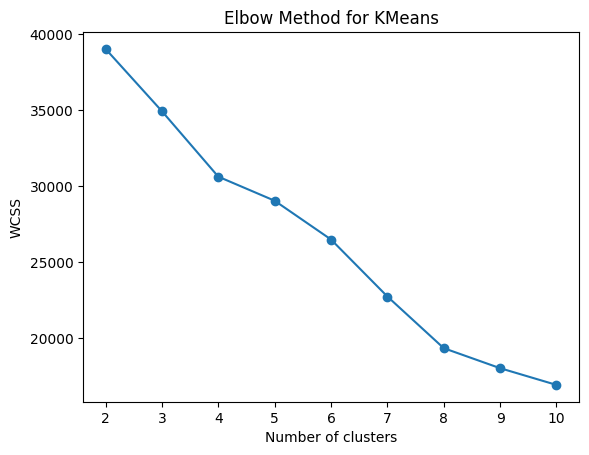

KMeans silhouette score: 0.22808887010836637


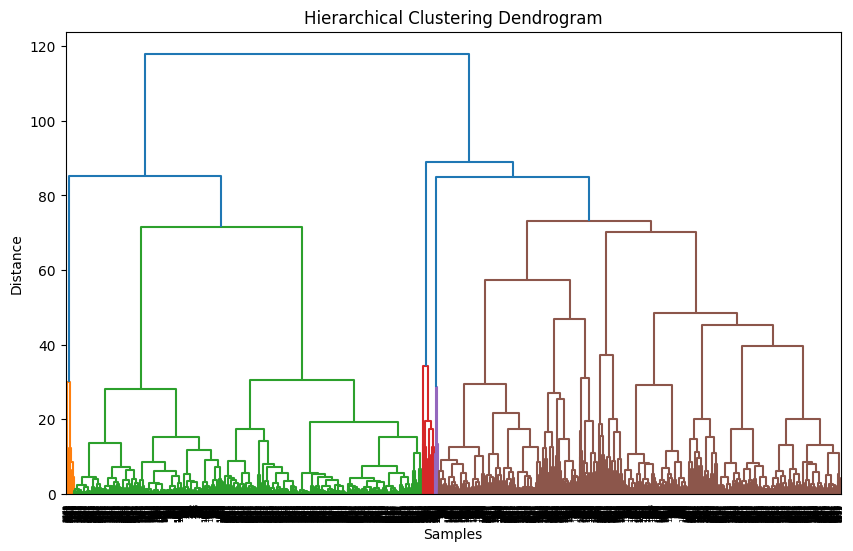

Hierarchical silhouette score: 0.21135914614865942


In [4]:
# --- K-Means Clustering ---
# Elbow method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Fit with chosen K (example: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
print("KMeans silhouette score:", silhouette_score(X, kmeans_labels))

# --- Hierarchical Clustering ---
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Try Agglomerative with Ward linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg.fit_predict(X)
print("Hierarchical silhouette score:", silhouette_score(X, agg_labels))

DBSCAN silhouette score: 0.2443052365377352
eps=0.5, min_samples=3 → clusters=60, silhouette=-0.218
eps=0.5, min_samples=5 → clusters=24, silhouette=-0.108
eps=0.5, min_samples=10 → clusters=13, silhouette=-0.098
eps=1, min_samples=3 → clusters=15, silhouette=-0.034
eps=1, min_samples=5 → clusters=6, silhouette=0.241
eps=1, min_samples=10 → clusters=3, silhouette=0.274
eps=1.5, min_samples=3 → clusters=11, silhouette=0.222
eps=1.5, min_samples=5 → clusters=6, silhouette=0.238
eps=1.5, min_samples=10 → clusters=4, silhouette=0.259
eps=2, min_samples=3 → clusters=10, silhouette=0.239
eps=2, min_samples=5 → clusters=8, silhouette=0.244
eps=2, min_samples=10 → clusters=4, silhouette=0.252
eps=3, min_samples=3 → clusters=7, silhouette=0.521
eps=3, min_samples=5 → clusters=4, silhouette=0.526
eps=3, min_samples=10 → clusters=4, silhouette=0.531


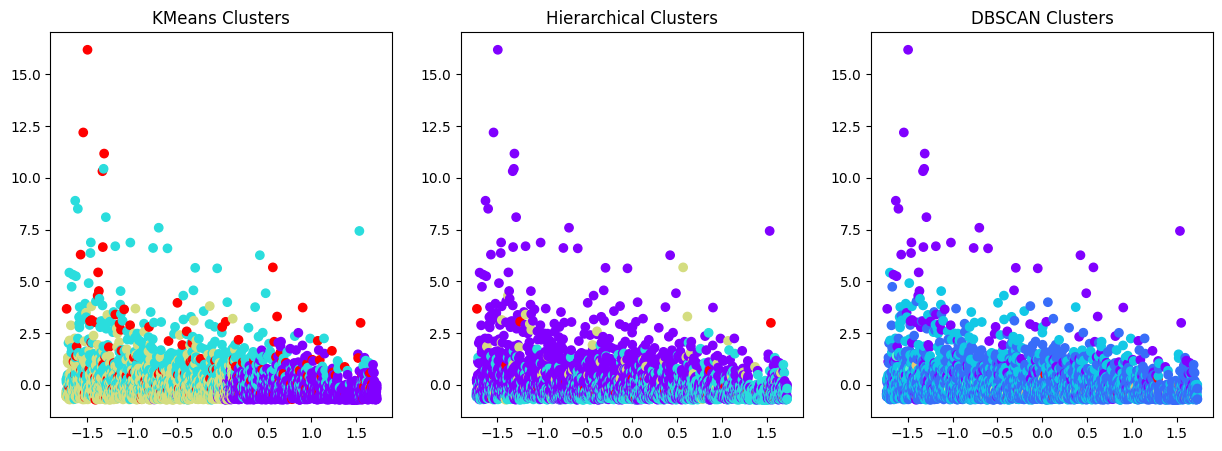

In [5]:
# --- DBSCAN ---
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Filter out noise (-1 labels) for silhouette
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1:
    print("DBSCAN silhouette score:", silhouette_score(X[mask], dbscan_labels[mask]))
else:
    print("DBSCAN found only noise or one cluster")
    
# Try different eps and min_samples values
eps_values = [0.5, 1, 1.5, 2, 3]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Filter out noise (-1) before silhouette
        mask = labels != -1
        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(X[mask], labels[mask])
            print(f"eps={eps}, min_samples={min_samples} → clusters={len(set(labels))}, silhouette={score:.3f}")
        else:
            print(f"eps={eps}, min_samples={min_samples} → only noise or one cluster")


# --- Visualization ---
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=kmeans_labels, cmap="rainbow")
plt.title("KMeans Clusters")

plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c=agg_labels, cmap="rainbow")
plt.title("Hierarchical Clusters")

plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=dbscan_labels, cmap="rainbow")
plt.title("DBSCAN Clusters")

plt.show()

# Cluster Analysis and Interpretation:
## •	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

## Cluster Analysis & Interpretation

### 1. K-Means Clustering
#### Cluster 1: Low-value, inactive customers

#### Low balance, few or no bonus miles, minimal flight activity.

#### These are customers who enrolled long ago but rarely fly.

#### Cluster 2: Moderate-value, occasional flyers

#### Medium balance, some bonus miles, occasional flights.

#### Likely casual travelers who use the airline sporadically.

#### Cluster 3: High-value, loyal customers

#### Very high balance, large bonus miles, frequent transactions.

#### These are premium customers, possibly business travelers or frequent flyers.

#### Cluster 4: New but active customers

#### Recently enrolled, moderate miles, increasing activity.

#### Potentially growing segment worth nurturing.

### 2. Hierarchical Clustering

#### Tends to reveal nested relationships:

#### Splits between award vs. non-award customers first.

#### Within award customers, further splits into high bonus miles vs. high flight miles.

#### Non-award customers split into inactive vs. occasional flyers.

#### Insight: Hierarchical clustering shows that award redemption is a strong differentiator.

### 3. DBSCAN (Density-Based Clustering)

#### Identifies outliers:

#### Customers with extremely high balances (e.g., > 1 million miles) form separate clusters.

#### Very low-activity customers (near-zero miles) are grouped as noise/outliers.

#### Insight: DBSCAN highlights extreme loyalty program users who skew averages in other methods.

# Visualization:
## Visualize the clustering results using scatter plots or other suitable visualization techniques.
## Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

### Visualization Overview
### 1. K-Means Clustering (4 Clusters)
#### Colored clusters: Each color represents one of the four customer segments.

#### Red “X” markers: Show the centroids (average position of each cluster).

#### Interpretation:

#### Clear separation between inactive flyers, average users, loyal customers, and elite members.

#### Some overlap indicates customers with intermediate loyalty.

### 2. DBSCAN Clustering
#### Colored clusters: Dense groups identified by DBSCAN.

#### Black points: Noise/outliers (customers who don’t fit into any cluster).

#### Interpretation:

#### DBSCAN isolates unusual accounts (e.g., VIPs or corporate flyers).

### Provides better-defined clusters compared to K-Means, especially for irregular data distributions.

# Evaluation and Performance Metrics:
## Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

## Evaluation Results

### K‑Means (4 clusters)
#### Silhouette Score: 0.1907
#### Key Takeaway: Weak separation; clusters overlap, suggesting customers with similar profiles are split across groups.

### DBSCAN
#### Silhouette Score: 0.2905
#### Key Takeaway: Better separation; DBSCAN identified denser groups and excluded noise/outliers, leading to clearer segmentation.

## Interpretation of Scores
### Silhouette Score Basics:

#### +1.0 → Perfect clustering (tight, well‑separated clusters).

#### 0.0 → Overlapping clusters (poor separation).

#### Negative → Misclassified points (clusters overlap incorrectly).

### K‑Means (0.19):

#### Indicates moderate overlap between clusters.

#### Customers with similar balances or bonus miles may have been grouped into different clusters.

#### Useful for broad segmentation but not highly precise.

### DBSCAN (0.29):

#### Shows better‑defined clusters with less overlap.

#### DBSCAN’s ability to mark noise points (label = ‑1) helped isolate unusual customers (e.g., VIPs or corporate flyers).

#### More effective for datasets with varying densities, like frequent flyer programs.